# Roll 20 Token Maker

**Instructions**
1. Go to [www.heroforge.com](https://www.heroforge.com) and make an icon.  Best practices are to clear the base and avoid poses where the weapon/items are too far out from the body.  Screenshot and Save figure (especially if making your character, since you may want to make a physical one at some point and order from them, good stuff).
2. Open in paint.net
3. In *Image->Canvas Size*, set Width and Height to 600, and Anchor to Middle.  Hit Okay.
4. In *Image->Resize*, set width and height to 400, hit Okay.
5. Save in *Roll20Tokens>* folder with a filename of your choice (Best practice end in 1 or 01)
6. Determine the first color, use Eraser (set Hardness to 100) to erase everywhere where you want that color. Save as 2 or 02.
7. Rinse and repeat til last color left.
8. Set filenames and colors below (Best Practice: do this as you go, to keep track of it in your mind.
9. Run the cells below (after updating the first cell).  Set name to a name without numbers.

I like to make 2 poses, a top-down of the token and a top-down of a prone token, since I use !swaptoken in Roll20.  I do the erasing in both at once, and add a d to all filenames to represent the dead one.  You don't have to do this, it's just something I like to do.


In [106]:
## lst is a list of tuples...
##  (Filename, color, texture)
## filename is without *.png
## color is last 6 of a hex
## texture is based on textures files.

lst =[
        ('test01', 'e3ccae','skin'),
        ('test02', 'A7856A','hair'),
        ('test03', '6A342A','leather'),
        ('test04', '195905','linen'),
        ('test05', 'faebd7','ash'),
        ('test06', 'e2ccb5','yew'),
        ('test07', '0E120E','horn'),
    ]
name="Test"

In [107]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib
import numpy as np

In [108]:
def draw_full(fname, color, mat):
        '''
        '''
        im = Image.open(fname).convert('RGBA')  # fix_pic(fname)
        img = set_color(im, color, mat)
        return img

def set_color(image, in_color, texture='none'):
        '''
        '''
        try:
            txtr = Image.open('textures/' + texture +'.png').convert('RGBA')
        except:
            txtr = Image.open('textures/none.png').convert('RGBA')
        h = in_color.replace('x','')
        r, g, b = tuple(int(h[i:i+2], 16) for i in (0, 2 ,4))
        R = []
        G = []
        B = []
        pix_old = image.load()
        pix_txt = txtr.load()
        img = Image.new(image.mode, image.size)
        pix_new = img.load()
        w=image.size[0]
        h=image.size[1]
        rav = 225
        gav = 225
        bav = 225
        for i in range(w):
            for j in range(h):
                clrs = pix_old[i, j]
                txts = pix_txt[i, j]
                ar = clrs[0]
                ag = clrs[1]
                ab = clrs[2]
                alp = clrs[3]
                if clrs[3] > 0:
                    ar = clrs[0] + txts[0] - 2*rav + r
                    ag = clrs[1] + txts[1] - 2*gav + g
                    ab = clrs[2] + txts[2] - 2*bav + b
                if ar > 255:
                    ar = 255
                if ag > 255:
                    ag = 255
                if ab > 255:
                    ab = 255
                if ar < 0:
                    ar = 0
                if ab < 0:
                    ab = 0
                if ag < 0:
                    ag = 0
                pix_new[i,j] = (ar, ag, ab, alp)
        return img

def fix_pic(fname):
    '''
    Edits a texture file to be colored with an average of 100.
    '''
    image = Image.open(fname).convert('RGBA')
    r, g, b = (255, 255, 255) # was 221
    R = []
    G = []
    B = []
    pix_old = image.load()
    img = Image.new( image.mode, image.size)
    pix_new = img.load()
    w=image.size[0]
    h=image.size[1]
    # find avergae value of all vars...
    for i in range(w):
          for j in range(h):
            temp = pix_old[i, j]
            if temp[3] > 0:
                R.append(temp[0])
                G.append(temp[1])
                B.append(temp[2])
    # avaoid NaN
    lst = [R, G, B]
    for cl in lst:
        if len(cl) == 0:
            cl.append(0)
    rav = int(np.mean(R))
    gav = int(np.mean(G))
    bav = int(np.mean(B))
    print(rav, gav, bav)
    for i in range(w):
        for j in range(h):
            clrs = pix_old[i, j]
            ar = clrs[0]
            ag = clrs[1]
            ab = clrs[2]
            alp = clrs[3]
            if clrs[3] > 0:
                ar = clrs[0] - rav + r
                ag = clrs[1] - gav + g
                ab = clrs[2] - bav + b
            pix_new[i,j] = (ar, ag, ab, alp)
    return img



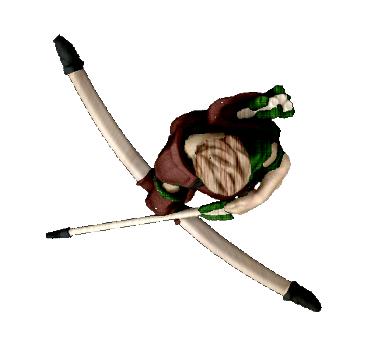

In [109]:
fig, ax  = plt.subplots(1, figsize=(4, 4))
# Turn of axis...
ax.set_axis_off()
image = Image.open('textures/none.png').convert('RGBA')
img = Image.new(image.mode, image.size)
pix = img.load()
canvas = FigureCanvas(fig)
implot = []
for i, tup in enumerate(lst):
    args = draw_full(tup[0]+".png", tup[1], tup[2])
    implot.append(ax.imshow(args))
fig.canvas.draw()
fig.savefig('{}.png'.format(name), format='png', frameon=False,
                         bbox_inches='tight', transparent=True)
plt.show()

## Color Guide

|	Name	|	Tags	|	Color (ignore x)	|
|	-----------------------	|	-----------------------	|	-----------------------	|
|	Western 1	|	skin, human	|	xf2dacd	|
|	Western 2	|	skin, human	|	xcf9a7c	|
|	Western 3	|	skin, human	|	xa76e48	|
|	Western 4	|	skin, human	|	xe3ccae	|
|	Western 6	|	skin, human	|	xf4c8a7	|
|	Eastern 1	|	skin, human	|	xfee4dd	|
|	Eastern 2	|	skin, human	|	xfde1cb	|
|	Eastern 3	|	skin, human	|	xd7a77a	|
|	Southern 1	|	skin, human	|	x8b6245	|
|	Southern 2	|	skin, human	|	xe2b08c	|
|	Southern 4	|	skin, human	|	xd1bba6	|
|	Southern 5	|	skin, human	|	x655b56	|
|	Southern 7	|	skin, human	|	xb67c6c	|
|	Eastern 4	|	skin, human	|	xf0c6a8	|
|	Eastern 5	|	skin, human	|	xe9b59b	|
|	Eastern 6	|	skin, human	|	xf9dfd0	|
|	Eastern 7	|	skin, human	|	xf6ded2	|
|	Eastern 9	|	skin, human	|	xa8614a	|
|	Western 7	|	skin, human	|	xfaf1ef	|
|	Western 6	|	skin, human	|	xffffff	|
|	Dark Brown	|	eyes, human, dwarf, gnome	|	x593722	|
|	Soft Brown	|	eyes, human, dwarf, gnome	|	x7B3E33	|
|	Blue	|	eyes, human, elf	|	x4766B2	|
|	Light Brown	|	eyes, human, dwarf, gnome	|	xA58454	|
|	Gray-Blue	|	eyes, human, elf	|	x6385B1	|
|	Dull Brown	|	eyes, human, dwarf, gnome	|	x736569	|
|	Dark Green	|	eyes, human, elf	|	x2C6538	|
|	Light Green	|	eyes, human, elf	|	x568A62	|
|	Violet	|	eyes, human, elf	|	x654F73	|
|	Dark Gray	|	eyes, human, dwarf, gnome	|	x596568	|
|	Gray-Violet	|	eyes, human, elf	|	x595465	|
|	Dark Blue-Gray	|	eyes, human, dwarf, gnome	|	x4A5C6E	|
|	Blue-Green	|	eyes, human, elf	|	x3E758F	|
|	Light-Blue	|	eyes, human, elf	|	x79A3DD	|
|	Gold	|	eyes, human, elf	|	xAD8D48	|
|	Pale Gold	|	eyes, human, dwarf, gnome	|	xA6AA85	|
|	Gray	|	eyes, human, dwarf, gnome	|	xAAB6CB	|
|	Black	|	eyes, human	|	x181818	|
|	Black	|	hair	|	x090806	|
|	Off Black	|	hair	|	x2C222B	|
|	Dark Gray	|	hair	|	x71635A	|
|	Medium Gray	|	hair	|	xB7A69E	|
|	Light Gray	|	hair	|	xD6C4C2	|
|	Platinum Blonde	|	hair	|	xCABFB1	|
|	Bleached Blonde	|	hair	|	xDCD0BA	|
|	White Blonde	|	hair	|	xFFF5E1	|
|	Light Blonde	|	hair	|	xE6CEA8	|
|	Golden Blonde	|	hair	|	xE5C8A8	|
|	Ash Blonde	|	hair	|	xDEBC99	|
|	Honey Blonde	|	hair	|	xB89778	|
|	Strawberry Blonde	|	hair	|	xA56B46	|
|	Light Red	|	hair	|	xB55239	|
|	Dark Red	|	hair	|	x8D4A43	|
|	Light Auburn	|	hair	|	x91553D	|
|	Dark Auburn	|	hair	|	x533D32	|
|	Dark Brown	|	hair	|	x3B3024	|
|	Golden Brown	|	hair	|	x554838	|
|	Medium Brown	|	hair	|	x4E433F	|
|	Chestnut Brown	|	hair	|	x504444	|
|	Brown	|	hair	|	x6A4E42	|
|	Light Brown	|	hair	|	xA7856A	|
|	Ash Brown	|	hair	|	x977961	|
|	Red, Scarlet	|	cloth	|	xCF4140	|
|	Red, Cardinal	|	cloth	|	xF94F4F	|
|	Red, Blood	|	cloth	|	x5C332F	|
|	Red	|	cloth	|	x913631	|
|	Red, Russet	|	cloth	|	x8D4539	|
|	Pink, Carnation 	|	cloth	|	xE08D3B	|
|	Pink, Rose	|	cloth	|	x945C65	|
|	Orange, Spice	|	cloth	|	xBA6759	|
|	Orange, Copper	|	cloth	|	xA96152	|
|	Yellow	|	cloth	|	xB89949	|
|	Yellow, Gold	|	cloth	|	x957741	|
|	Yellow, Butter	|	cloth 	|	xB1A16E	|
|	Yellow, Maize	|	cloth	|	xBCB7BB	|
|	Green, Dark	|	cloth	|	x505750	|
|	Green, Spring	|	cloth	|	x7F8176	|
|	Green, Sage	|	cloth	|	x939280	|
|	Green, celery	|	cloth	|	x8F8C6B	|
|	Green, Pale	|	cloth	|	xAAB9B4	|
|   Green, Lincoln | cloth | x195905 | 
|	Blue, Royal	|	cloth	|	x22407E	|
|	Blue, Midnight	|	cloth	|	x323949	|
|	Blue, Navy	|	cloth	|	x4C5C75	|
|	Blue, Teal	|	cloth	|	x365E78	|
|	Blue, Light	|	cloth	|	x8DA4B6	|
|	Brown, Walnut	|	cloth	|	x4D423E	|
|	Brown, Tan	|	cloth	|	xA7967C	|
|	Brown, Spice	|	cloth	|	x764B3B	|
|	Grey, Charcoal	|	cloth	|	x5F5B5C	|
|	White	|	cloth	|	xffffff	|
|   Linen   |  cloth  | xfaf0e6 |
|	Tan	|	leather	|	xC49C79	|
|	Brown	|	leather	|	x6A342A	|
|	Dark Brown	|	leather	|	x4D393A	|
|	Red	|	leather	|	xA44448	|
|	Green	|	leather	|	x64774A	|
|	Black	|	leather	|	x2E2D29	|
|	Glidden Brown	|	leather	|	x624a2e	|
|	Another brown	|	leather	|	x501b00	|
|	Lighter Brown	|	leather	|	x632100	|
|	Dark leather	|	leather	|	x541101	|
|	Neutral	|	leather	|	x906a54	|
|	steel	|	metal	|	xb0c4de	|
|	silver	|	metal	|	xC6D0D6	|
|	gold	|	metal	|	xCFB53B	|
|	copper	|	metal	|	x8A665A	|
|	mithral	|	metal	|	xC6D0D6	|
|	iron	|	metal	|	x434b4d	|
|	brass	|	metal	|	xb5a642 	|
|	oak	|	wood	|	xece5da	|
|	ash	|	wood	|	xfaebd7	|
|	yew	|	wood	|	xe2ccb5	|
|	bogoak	|	wood	|	x4F2412	|
|	spruce	|	wood	|	xb69b4c	|
|  horn nock   | horn |  #0E120E  |
| bone | bone | xe3dac9 |
|bone, orange?| bone |xE1D4C0 |
|Plague| plague, skin| xC68400|
|Hobgoblin Flesh| skin | C68400 |
|Gnoll Fur | fur | 976F3C |
| Gzoblin Flesh | plague | 9C8A53 |
| Fairy Skin | skin | e5eec5 |